# Import Libraries 

In [12]:
import os

from IPython.html import widgets
from IPython.display import display

import matplotlib.pyplot as plt
%gui qt

from PyQt4 import QtCore, QtGui
%matplotlib inline

This notebook will rebin a set of fits images given

 - step1: the user will select an input folder
 - step2: specify the binning (add 2 files together, 3 files together, 4 files...etc)
 - step3: perform binning
 - step4: select output folder and write out new images binned
 
 extra feature: 
 
 - allow user to select binning algorithm
         - add
         - mean
         - median

# Select Input Files 

In [13]:
# debugging only
root_folder = '/Volumes/My Book Thunderbolt Duo/IPTS/TempData/'

In [14]:
def gui_fname(dir=None):
    """Select files to add
    """
    if dir is None: dir ='./'
    fname = QtGui.QFileDialog.getOpenFileNames(None, "Select file...", 
            dir, filter="FITS files(*.fits)")
    return fname

In [15]:
%gui qt
full_fname = gui_fname(dir = root_folder)

# Select Algorithm 

In [23]:
algo = widgets.RadioButtons(description = 'Binning Algorithm:',
                           options = ['Add', 'Mean', 'Median'])
display(algo)

# Bin Parameter 

In [36]:
bin_para = widgets.Text(description = 'How to group (bin) the files together:',
                        value = '2')
display(bin_para)

# Output Folder

In [18]:
def gui_fname(dir=None):
    """Select a file via a dialog and returns the file name.
    """
    if dir is None: dir ='./'
    dir_name = QtGui.QFileDialog.getExistingDirectory(None, "Select Folder ...",
                                                  dir,
                                                  QtGui.QFileDialog.ShowDirsOnly)
    return dir_name

In [19]:
%gui qt
dir_name = gui_fname(dir=root_folder)

# Calculation 

### Load data

In [29]:
images = None




## define algorithms

In [30]:
def add(array_images=None, bin_value=2):
    '''will add the images by bin_value
    
    input:
    array_images: numpy array of images to bin
    bin_value: by which value we need to rebin the images
    
    returns:
    dictionary {'images_bin': images_bin,
                'info': {'files_created': -1,
                        'number_files_not_used': -1,
                        'list_files_not_used: None 
                        }
                }
    '''
    raise NotImplementedError
    
    
    

In [31]:
def mean(array_images=None, bin_value=2):
    '''will do the mean of the images, bin_value by bin_value at a time
    
    input:
    array_images: numpy array of images to bin
    bin_value: by which value we need to rebin the images
    
    returns:
    dictionary {'images_bin': images_bin,
                'info': {'files_created': -1,
                        'number_files_not_used': -1,
                        'list_files_not_used: None 
                        }
                }
    '''raise NotImplementedError

In [32]:
def median(array_images=None, bin_value=2):
    '''will get the median value of the images, bin_value by bin_value at a time
    
    input:
    array_images: numpy array of images to bin
    bin_value: by which value we need to rebin the images
    
    returns:
    dictionary {'images_bin': images_bin,
                'info': {'files_created': -1,
                        'number_files_not_used': -1,
                        'list_files_not_used: None 
                        }
                }
    '''raise NotImplementedError

### run correct algorithm

In [37]:
bin_value = bin_para.value

if algo.value is 'Add':
    result = add(array_images=images, bin_value=bin_value)
elif algo.value is 'Mean':
    result = mean(array_images=images, bin_value=bin_value)
elif algo.value is 'Meadian':
    result = median(array_images=images, bin_value=bin_value)
else:
    raise NotImplementedError

NotImplementedError: 

### old code here 

In [48]:
import os

from IPython.html import widgets
from IPython.display import display

import matplotlib.pyplot as plt

In [49]:
%gui qt

In [50]:
root_folder = '/Users/j35/Desktop/add_data/'

In [51]:
from PyQt4 import QtCore, QtGui

def gui_fname(dir=None):
    """Select files to add
    """
    if dir is None: dir ='./'
    fname = QtGui.QFileDialog.getOpenFileNames(None, "Select file...", 
            dir, filter="FITS files(*.fits)")
    return fname

In [52]:
%gui qt
full_fname = gui_fname(dir = root_folder)
%matplotlib inline

## loading the data 

In [53]:
try:
    import pyfits
except:
    %pip install pyfits
    import pyfits

In [54]:
w = widgets.IntProgress()
w.max = len(full_fname)-1
display(w)

index = 0
data = []
for _file in full_fname:
    hdu_list = pyfits.open(_file)
    hdu = hdu_list[0]
    data.append(hdu.data)
    w.value = index
    index += 1

In [55]:
sum_data = data[0]
for index in range(1, len(full_fname)):
    _new_data = data[index]
    sum_data += _new_data


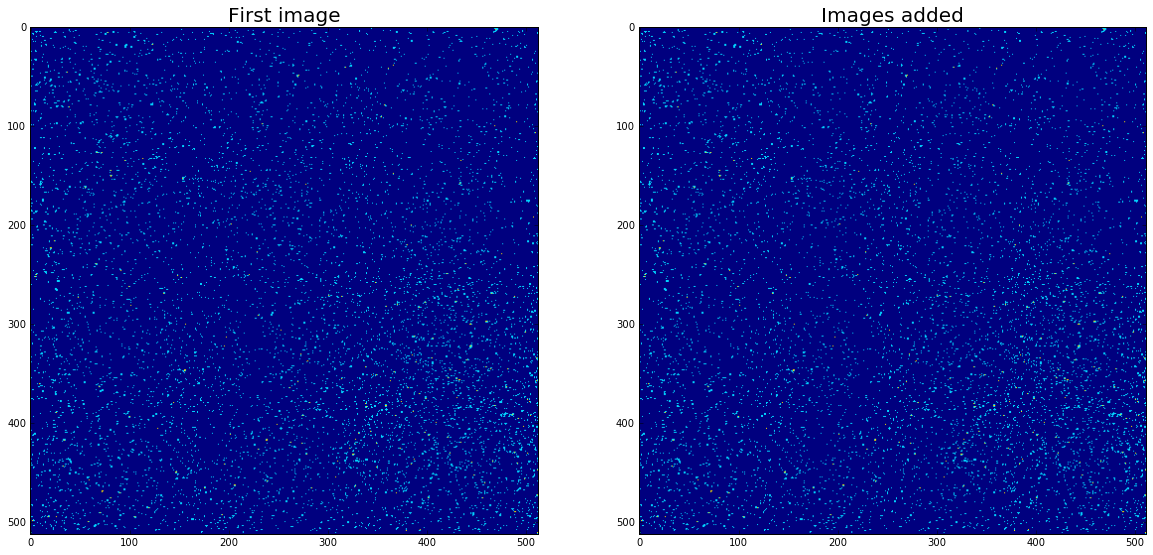

In [56]:
fig = plt.figure(figsize=(20,20))
ax_before = plt.subplot(121)
ax_before.set_title("First image", fontsize=20)
ax_add = plt.subplot(122)
ax_add.set_title("Images added", fontsize=20)

ax1 = ax_before.imshow(data[0])
ax2 = ax_add.imshow(sum_data) 


## Exporting data 

In [57]:
from PyQt4 import QtCore, QtGui

def gui_fname(dir=None):
    """Select a file via a dialog and returns the file name.
    """
    if dir is None: dir ='./'
    dir_name = QtGui.QFileDialog.getExistingDirectory(None, "Select Folder ...",
                                                  dir,
                                                  QtGui.QFileDialog.ShowDirsOnly)
    return dir_name

In [58]:
%gui qt
dir_name = gui_fname(dir = root_folder)
%matplotlib inline

In [39]:
[basename, ext] = os.path.splitext(full_fname[0])
new_name = basename + '_' + str(len(full_fname)) + 'files_added.fits'

In [60]:
hdu = pyfits.PrimaryHDU(sum_data)
hdulist = pyfits.HDUList([hdu])
hdulist.writeto(new_name)